# Extracting aggregated generation by type from ENTSO-E data

In [1]:
import os, sys
sys.path.append('../TimeSeries/')

import time_series as ts
import entso_e

In [2]:
import matplotlib.pyplot as plt
import pandas as pd

Directory in which the ENTSO-E data has been downloaded (see the notebook [ENTSO-E_time_series](./ENTSO-E_time_series.ipynb) for more info):

In [3]:
data_source = os.path.expanduser('~/data/entso-e/raw')

Select a year:

In [4]:
year = 2020

List available production types:

In [5]:
entso_e.extract_aggregated_production_types(data_source, year)

['Fossil Coal-derived gas',
 'Fossil Brown coal/Lignite',
 'Fossil Oil shale',
 'Fossil Gas',
 'Biomass',
 'Hydro Run-of-river and poundage',
 'Fossil Oil',
 'Fossil Peat',
 'Fossil Hard coal',
 'Hydro Water Reservoir',
 'Other renewable',
 'Hydro Pumped Storage',
 'Geothermal',
 'Solar',
 'Marine',
 'Nuclear',
 'Wind Onshore',
 'Waste',
 'Wind Offshore',
 'Other']

## Switzerland

In [6]:
entso_e.extract_aggregated_production_types(data_source, year, country_code = 'CH')

['Hydro Run-of-river and poundage',
 'Hydro Water Reservoir',
 'Hydro Pumped Storage',
 'Solar',
 'Nuclear',
 'Wind Onshore']

In [7]:
CH_nuclear = entso_e.extract_production_by_type_time_series(data_source, 'Nuclear', 'CH', year)

  0%|          | 0/12 [00:00<?, ?it/s]

In [8]:
CH_hydro_reservoir = entso_e.extract_production_by_type_time_series(data_source, 'Hydro Water Reservoir', 'CH', year)

  0%|          | 0/12 [00:00<?, ?it/s]

In [9]:
CH_hydro_pumped = entso_e.extract_production_by_type_time_series(data_source, 'Hydro Pumped Storage', 'CH', year)

  0%|          | 0/12 [00:00<?, ?it/s]

In [10]:
CH_hydro_combined = CH_hydro_reservoir + CH_hydro_pumped

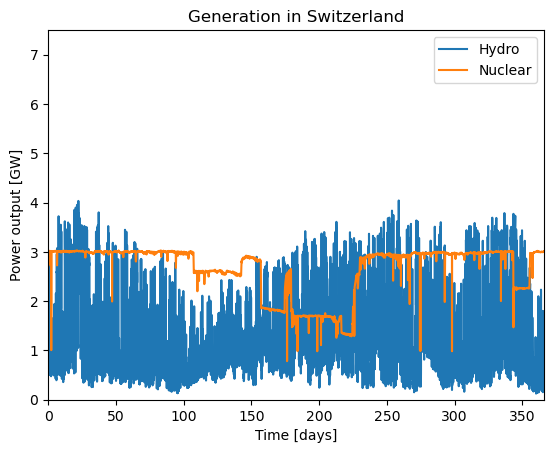

In [11]:
T = len(CH_nuclear)

x = [t / 24 for t in range(T)]
plt.plot(x, CH_hydro_reservoir / 1000, label='Hydro')
plt.plot(x, CH_nuclear / 1000, label='Nuclear')
plt.title('Generation in Switzerland')
plt.xlim(0, 366)
plt.xlabel('Time [days]')
plt.ylim(0, 7.5)
plt.ylabel('Power output [GW]')
plt.legend()
plt.show()

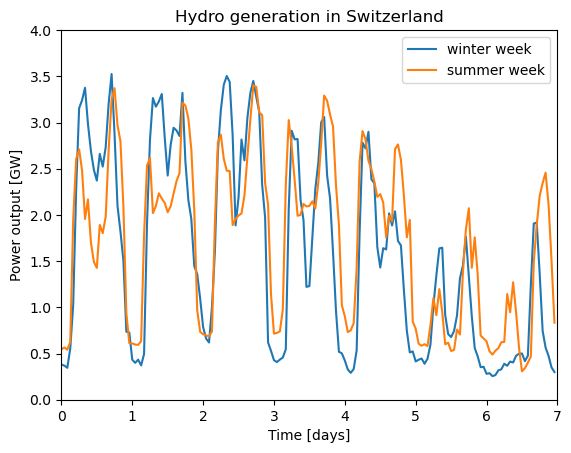

In [12]:
x = [t / 24 for t in range(7 * 24)]
y = ts.make_364_periodic(CH_hydro_reservoir / 1000, year, verbose=False)
plt.plot(x, y[3*7*24:4*7*24], label='winter week')
plt.plot(x, y[28*7*24:29*7*24], label='summer week')
plt.title('Hydro generation in Switzerland')
plt.xlim(0, 7)
plt.xlabel('Time [days]')
plt.ylim(0, 4)
plt.ylabel('Power output [GW]')
plt.legend()
plt.show()

## Spain

In [13]:
entso_e.extract_aggregated_production_types(data_source, year, country_code = 'ES')

['Fossil Coal-derived gas',
 'Fossil Brown coal/Lignite',
 'Fossil Oil shale',
 'Fossil Gas',
 'Biomass',
 'Hydro Run-of-river and poundage',
 'Fossil Oil',
 'Fossil Peat',
 'Fossil Hard coal',
 'Hydro Water Reservoir',
 'Other renewable',
 'Hydro Pumped Storage',
 'Geothermal',
 'Solar',
 'Marine',
 'Nuclear',
 'Wind Onshore',
 'Waste',
 'Wind Offshore',
 'Other']

In [14]:
ES_nuclear = entso_e.extract_production_by_type_time_series(data_source, 'Nuclear', 'ES', year)

  0%|          | 0/12 [00:00<?, ?it/s]

In [15]:
ES_hydro_reservoir = entso_e.extract_production_by_type_time_series(data_source, 'Hydro Water Reservoir', 'ES', year)

  0%|          | 0/12 [00:00<?, ?it/s]

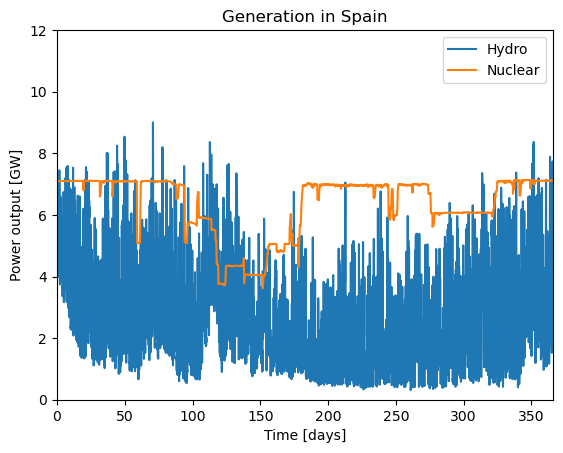

In [16]:
T = len(ES_nuclear)

x = [t / 24 for t in range(T)]
plt.plot(x, ES_hydro_reservoir / 1000, label='Hydro')
plt.plot(x, ES_nuclear / 1000, label='Nuclear')
plt.title('Generation in Spain')
plt.xlim(0, 366)
plt.xlabel('Time [days]')
plt.ylim(0, 12)
plt.ylabel('Power output [GW]')
plt.legend()
plt.show()

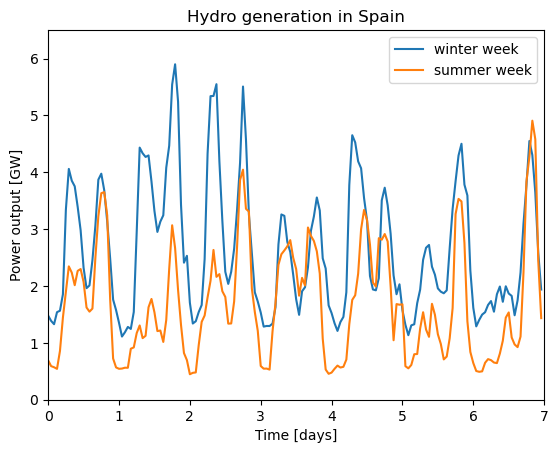

In [17]:
x = [t / 24 for t in range(7 * 24)]
y = ts.make_364_periodic(ES_hydro_reservoir / 1000, year, verbose=False)
plt.plot(x, y[3*7*24:4*7*24], label='winter week')
plt.plot(x, y[28*7*24:29*7*24], label='summer week')
plt.title('Hydro generation in Spain')
plt.xlim(0, 7)
plt.xlabel('Time [days]')
plt.ylim(0, 6.5)
plt.ylabel('Power output [GW]')
plt.legend()
plt.show()

In [27]:
# x = [t / 24 for t in range(7 * 24)]
# y = ts.make_364_periodic(ES_hydro_reservoir / 1000, year, verbose=False)
# z = pd.read_csv('../run/data/ES_hydro_aggregated_summer_week.csv').T.values[0]
# plt.plot(x, y[28*7*24:29*7*24], label='actual data 2020')
# plt.plot(x, z, label='syntetic data')
# plt.title('Hydro generation in Spain, summer week')
# plt.xlim(0, 7)
# plt.xlabel('Time [days]')
# plt.ylim(0, 6.5)
# plt.ylabel('Power output [GW]')
# plt.legend()
# plt.show()

## Germany

In [19]:
entso_e.extract_aggregated_production_types(data_source, year, country_code = 'DE')

['Fossil Brown coal/Lignite',
 'Fossil Gas',
 'Biomass',
 'Hydro Run-of-river and poundage',
 'Fossil Oil',
 'Fossil Hard coal',
 'Hydro Water Reservoir',
 'Other renewable',
 'Hydro Pumped Storage',
 'Geothermal',
 'Solar',
 'Nuclear',
 'Wind Onshore',
 'Waste',
 'Wind Offshore',
 'Other']

In [20]:
DE_nuclear = entso_e.extract_production_by_type_time_series(data_source, 'Nuclear', 'DE', year)

  0%|          | 0/12 [00:00<?, ?it/s]

In [21]:
DE_fossil = entso_e.extract_production_by_type_time_series(data_source, 'Fossil Brown coal/Lignite', 'DE', year) \
    + entso_e.extract_production_by_type_time_series(data_source, 'Fossil Hard coal', 'DE', year) \
    + entso_e.extract_production_by_type_time_series(data_source, 'Fossil Gas', 'DE', year) \
    + entso_e.extract_production_by_type_time_series(data_source, 'Fossil Oil', 'DE', year)

  0%|          | 0/12 [00:00<?, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

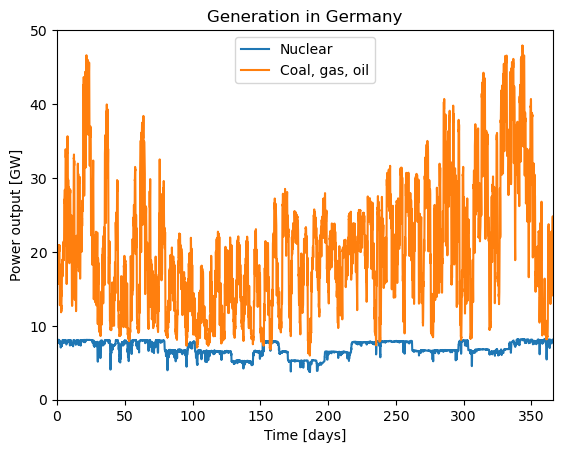

In [24]:
T = len(DE_fossil)

x = [t / 24 for t in range(T)]
plt.plot(x, DE_nuclear / 1000, label='Nuclear')
plt.plot(x, DE_fossil / 1000, label='Coal, gas, oil')
plt.title('Generation in Germany')
plt.xlim(0, 366)
plt.xlabel('Time [days]')
plt.ylim(0, 50)
plt.ylabel('Power output [GW]')
plt.legend()
plt.show()

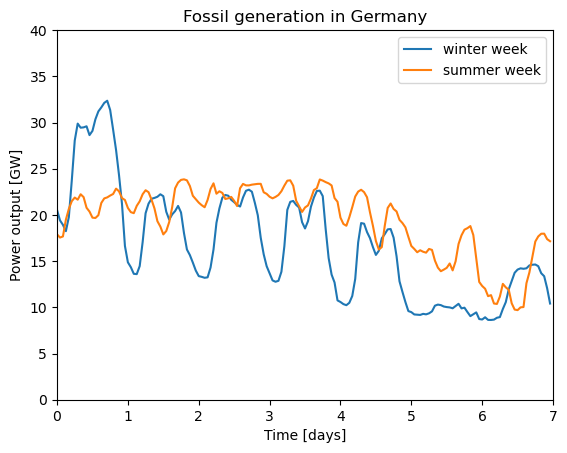

In [25]:
x = [t / 24 for t in range(7 * 24)]
y = ts.make_364_periodic(DE_fossil / 1000, year, verbose=False)
plt.plot(x, y[3*7*24:4*7*24], label='winter week')
plt.plot(x, y[28*7*24:29*7*24], label='summer week')
plt.title('Fossil generation in Germany')
plt.xlim(0, 7)
plt.xlabel('Time [days]')
plt.ylim(0, 40)
plt.ylabel('Power output [GW]')
plt.legend()
plt.show()

In [28]:
# x = [t / 24 for t in range(7 * 24)]
# y = ts.make_364_periodic(DE_fossil / 1000, year, verbose=False)
# z = pd.read_csv('../run/data/DE_fossil_aggregated_winter_week.csv').T.values[0]
# plt.plot(x, y[3*7*24:4*7*24], label='actual data 2020')
# plt.plot(x, z, label='syntetic data')
# plt.title('Fossil generation in Germany, winter week')
# plt.xlim(0, 7)
# plt.xlabel('Time [days]')
# plt.ylim(0, 40)
# plt.ylabel('Power output [GW]')
# plt.legend()
# plt.show()